In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

sns.set_theme(style="ticks")

In [2]:
x = np.linspace(0, 100, 1000)
y = pd.Series(np.sin(x), index=x)

LIMIT = 300

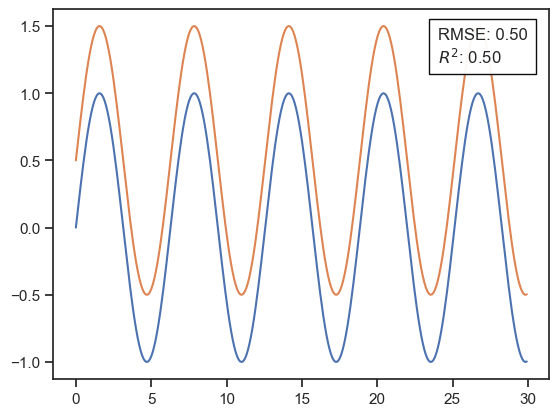

In [31]:
y_hat1 = pd.Series(np.sin(x) + 0.5, index=x)

plt.text(
    0.775,
    0.9,
    f"RMSE: {np.sqrt(mean_squared_error(y, y_hat1)):.2f}\n$R^2$: {r2_score(y, y_hat1):.2f}",
    va="center",
    bbox=dict(
        boxstyle="square,pad=0.5",
        edgecolor="black",
        facecolor="white",
        alpha=0.95,
    ),
    transform=plt.gca().transAxes,
)

plt.plot(x[0:LIMIT], y.iloc[0:LIMIT], label="Actual")
plt.plot(x[0:LIMIT], y_hat1.iloc[0:LIMIT], label="Predicted")

plt.show()

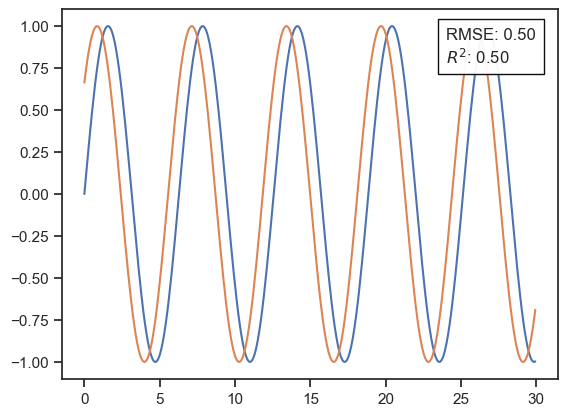

In [34]:
y_hat2 = pd.Series(np.sin(x + 0.725), index=x)

plt.text(
    0.775,
    0.9,
    f"RMSE: {np.sqrt(mean_squared_error(y, y_hat2)):.2f}\n$R^2$: {r2_score(y, y_hat2):.2f}",
    va="center",
    bbox=dict(
        boxstyle="square,pad=0.5",
        edgecolor="black",
        facecolor="white",
        alpha=0.95,
    ),
    transform=plt.gca().transAxes,
)

plt.plot(x[0:LIMIT], y.iloc[0:LIMIT], label="Actual")
plt.plot(x[0:LIMIT], y_hat2.iloc[0:LIMIT], label="Predicted")

plt.show()

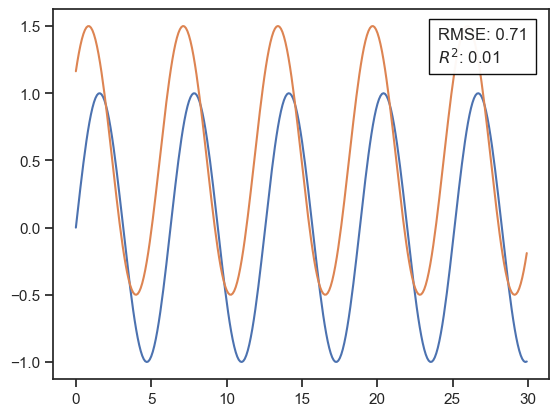

In [35]:
y_hat3 = pd.Series(np.sin(x + 0.725) + 0.5, index=x)

plt.text(
    0.775,
    0.9,
    f"RMSE: {np.sqrt(mean_squared_error(y, y_hat3)):.2f}\n$R^2$: {r2_score(y, y_hat3):.2f}",
    va="center",
    bbox=dict(
        boxstyle="square,pad=0.5",
        edgecolor="black",
        facecolor="white",
        alpha=0.95,
    ),
    transform=plt.gca().transAxes,
)

plt.plot(x[0:LIMIT], y.iloc[0:LIMIT], label="Actual")
plt.plot(x[0:LIMIT], y_hat3.iloc[0:LIMIT], label="Predicted")

plt.show()

In [6]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks


def calculate_alignment_and_magnitude_score(
    original_series, compared_series, peak_prominence=0.5
):
    """
    Calculates a score (lower the better) based on the alignment of crests and troughs and the closeness of their magnitudes.
    :param original_series: The original time series.
    :param compared_series: The time series to compare.
    :param peak_prominence: The prominence of a peak in the time series.
    :return: alignment score, magnitude score, and combined score.
    """
    op, _ = find_peaks(original_series, prominence=peak_prominence)
    ot, _ = find_peaks(-original_series, prominence=peak_prominence)
    cp, _ = find_peaks(compared_series, prominence=peak_prominence)
    ct, _ = find_peaks(-compared_series, prominence=peak_prominence)

    min_peaks = min(len(op), len(cp))
    min_troughs = min(len(ot), len(ct))
    op, cp = op[:min_peaks], cp[:min_peaks]
    ot, ct = ot[:min_troughs], ct[:min_troughs]

    align_peaks = np.mean(
        np.abs(original_series.index[op] - compared_series.index[cp])
    )
    align_troughs = np.mean(
        np.abs(original_series.index[ot] - compared_series.index[ct])
    )
    mag_peaks = np.mean(
        np.abs(
            original_series.iloc[op].values - compared_series.iloc[cp].values
        )
    )
    mag_troughs = np.mean(
        np.abs(
            original_series.iloc[ot].values - compared_series.iloc[ct].values
        )
    )

    w1, w2 = 0.75, 0.25
    align_score = (align_peaks + align_troughs) * 0.5
    mag_score = (mag_peaks + mag_troughs) * 0.5
    combined_score = w1 * align_score + w2 * mag_score

    return (
        [align_peaks, align_troughs, align_score],
        [mag_peaks, mag_troughs, mag_score],
        combined_score,
    )

In [7]:
(
    align_score,
    mag_score,
    combined_score,
) = calculate_alignment_and_magnitude_score(y, y_hat1)
print(f"[1] Alignment Score :\t{align_score[-1]:.3f}")
print(f"[2] Magnitude Score :\t{mag_score[-1]:.3f}")
print(f"[3] Combined Score  :\t{combined_score:.3f}")

[1] Alignment Score :	0.000
[2] Magnitude Score :	0.500
[3] Combined Score  :	0.125


In [8]:
(
    align_score,
    mag_score,
    combined_score,
) = calculate_alignment_and_magnitude_score(y, y_hat2)
print(f"[1] Alignment Score :\t{align_score[-1]:.3f}")
print(f"[2] Magnitude Score :\t{mag_score[-1]:.3f}")
print(f"[3] Combined Score  :\t{combined_score:.3f}")

[1] Alignment Score :	3.140
[2] Magnitude Score :	0.001
[3] Combined Score  :	2.355


In [9]:
(
    align_score,
    mag_score,
    combined_score,
) = calculate_alignment_and_magnitude_score(y, y_hat3)
print(f"[1] Alignment Score :\t{align_score[-1]:.3f}")
print(f"[2] Magnitude Score :\t{mag_score[-1]:.3f}")
print(f"[3] Combined Score  :\t{combined_score:.3f}")

[1] Alignment Score :	3.140
[2] Magnitude Score :	0.500
[3] Combined Score  :	2.480


In [10]:
y = pd.Series(2 * (x * 0.25 - np.floor(1 / 2 + x * 0.25)), index=x)

[1] RMSE            :	0.50
[2] R^2             :	0.25
[3] Alignment Score :	0.000
[4] Magnitude Score :	0.500
[5] Combined Score  :	0.125
--------------------------------------------------------------------------------


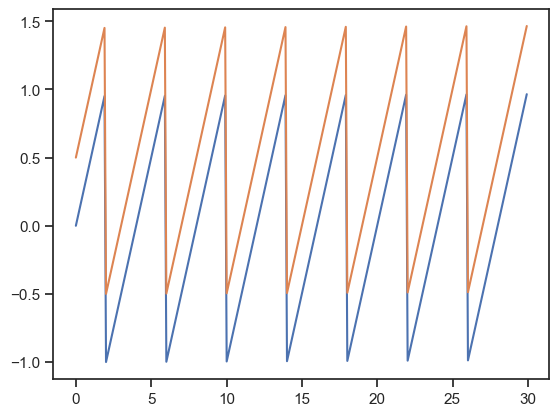

In [11]:
y_hat1 = y + 0.5

(
    align_score,
    mag_score,
    combined_score,
) = calculate_alignment_and_magnitude_score(y, y_hat1)

print(f"[1] RMSE            :\t{np.sqrt(mean_squared_error(y, y_hat1)):.2f}")
print(f"[2] R^2             :\t{r2_score(y, y_hat1):.2f}")
print(f"[3] Alignment Score :\t{align_score[-1]:.3f}")
print(f"[4] Magnitude Score :\t{mag_score[-1]:.3f}")
print(f"[5] Combined Score  :\t{combined_score:.3f}")
print("-" * 80)

plt.plot(x[0:LIMIT], y.iloc[0:LIMIT], label="Actual")
plt.plot(x[0:LIMIT], y_hat1.iloc[0:LIMIT], label="Predicted")

plt.show()

[1] RMSE            :	0.50
[2] R^2             :	0.25
[3] Alignment Score :	0.268
[4] Magnitude Score :	0.021
[5] Combined Score  :	0.207
--------------------------------------------------------------------------------


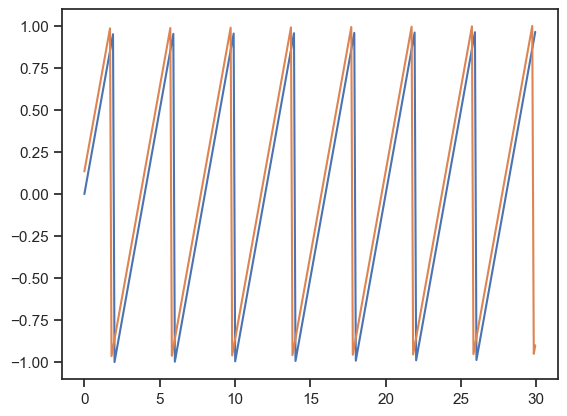

In [12]:
y_hat2 = pd.Series(
    2 * ((x + 0.270) * 0.25 - np.floor(1 / 2 + (x + 0.270) * 0.25)), index=x
)

(
    align_score,
    mag_score,
    combined_score,
) = calculate_alignment_and_magnitude_score(y, y_hat2)

print(f"[1] RMSE            :\t{np.sqrt(mean_squared_error(y, y_hat2)):.2f}")
print(f"[2] R^2             :\t{r2_score(y, y_hat2):.2f}")
print(f"[3] Alignment Score :\t{align_score[-1]:.3f}")
print(f"[4] Magnitude Score :\t{mag_score[-1]:.3f}")
print(f"[5] Combined Score  :\t{combined_score:.3f}")
print("-" * 80)

plt.plot(x[0:LIMIT], y.iloc[0:LIMIT], label="Actual")
plt.plot(x[0:LIMIT], y_hat2.iloc[0:LIMIT], label="Predicted")

plt.show()